![](https://i.imgur.com/OQjdeZU.png)

# 1. Introduction

It's "economy time that nobody asked for, but I'm still giving it to you."

Some quick back stories before we begin:

1. **US Treasury Yield Curve** is a line that plots on the X axis the "Years of Maturity", meaning the amount of time it takes for a debt to be paid and on the Y axis the value of the "Yield" (or the interest rate).

2. **Years of Maturity**: the debt can be made, as any debt, on different periods of time: could be made for 1 month, or it could be made for 30 years.

How does the picture usually look like? Naturally, the interest *rates are small for short periods of time and long for longer periods of time*, right? (I'll insert a photo for your refference below, look at the blue line).

![image.png](https://i.imgur.com/5e5tjUZ.png)

But, sometimes, this "naturality" inverts itself (red line), meaning that the interests are bigger for short period debts and smaller for longer periods.

### This phenomena is widely thought by the economists being a **prediction for a recession**. But how good of a prediction?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

# Read the data
data = pd.read_csv("../input/data-yield-curve/Data Yield Curve.csv")

# Rename CHHUSD in CHFUSD
data.rename(columns = {'CHHUSD':'CHFUSD'}, inplace = True)

# Create variable year
data['Year'] = data['Date'].apply(lambda i: i.split('-')[0]).astype(int)

# Yield Curve Inverted
inverted_data = pd.read_csv("../input/data-yield-curve/Yield-curve-inverted.csv")
df = pd.melt(inverted_data, id_vars='Maturities', value_vars=['23.08.2019', '23.08.2018'], var_name='Dates')

# Visuals setup
sns.set(style = 'whitegrid')

# 2. Yield Curve Maturities for 23.08. (2018 and 2019)

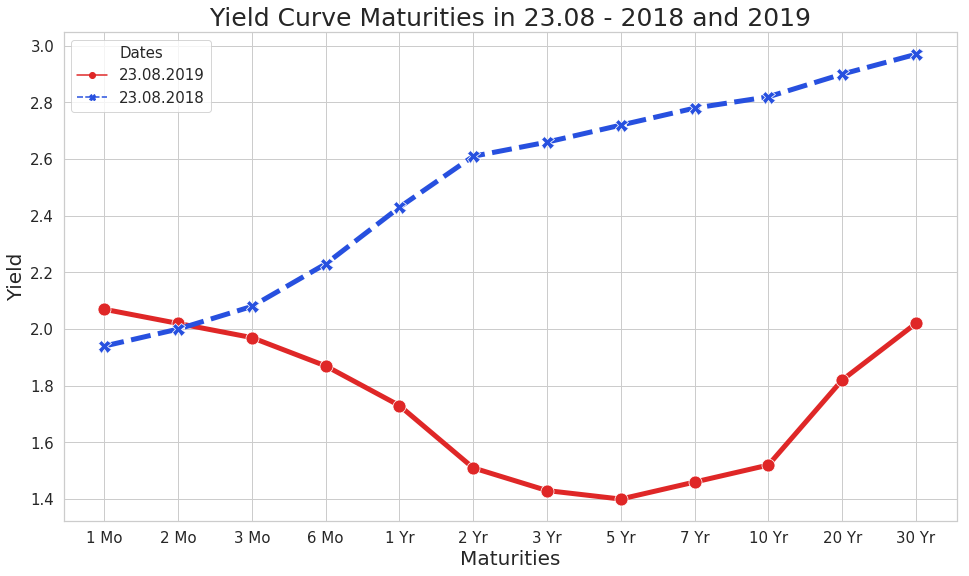

In [2]:
plt.figure(figsize=(16,9))

ax1 = sns.lineplot(x = 'Maturities', y = 'value', hue = 'Dates', data = df, lw = 5, err_style=None,
                  legend = 'full', size_order=['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'], sort = False, palette = ["#DF2727", "#2750DF"],
                  markers = True, style = "Dates", markersize = 13)


plt.legend(['23.08.2019', '23.08.2018'])
plt.title('Yield Curve Maturities in 23.08 - 2018 and 2019', fontsize = 25)
plt.xlabel('Maturities', fontsize = 20)
plt.ylabel('Yield', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15);

The graph above shows the yield curves on 23 of August 2018 and respectively 2019. They are for sure inverted, meaning that interest rates for long term debt are lower, therefore the **investors start to expect a recession**.

# 3. Yield Curves in Time

Now, let's look at the Yield Curve throughout time to understand what's happening. For an easier read, we selected the **values of the yeald curve for 1 and 30 year Maturity, starting 1977 to 2019**. With a **total mean by year**, we can expect to see some moments in time where the 2 yield curves are touching lightly, meaning that year the 2 curves inverted.

Enough gibberish, let's see something concrete.

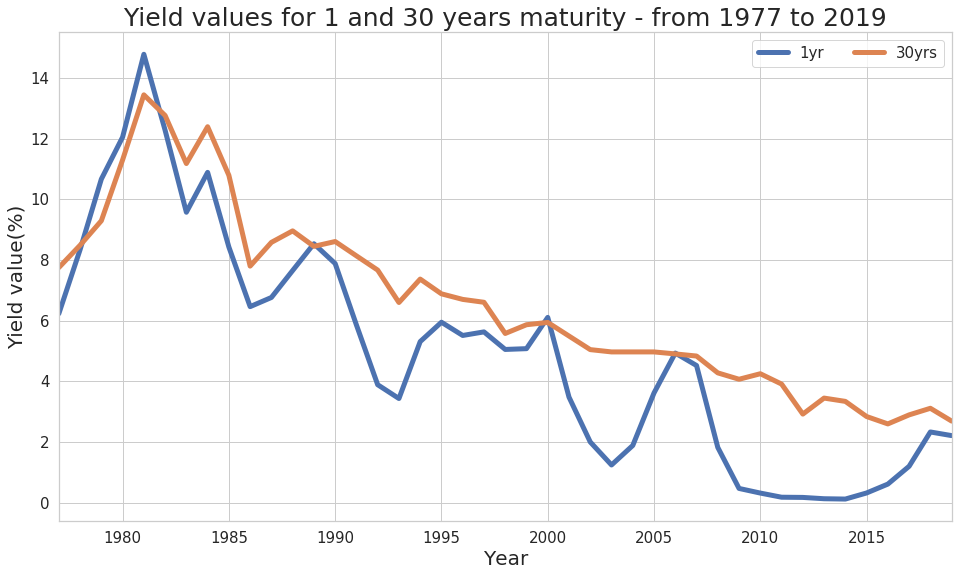

In [3]:
plt.figure(figsize=(16,9))

ax1 = sns.lineplot(x = 'Year', y = '1 yr', data=data, err_style=None, lw = 5, estimator='mean',
                  palette = "Dark2")
ax2 = sns.lineplot(x = 'Year', y = '30YR', data=data, err_style=None, lw = 5, estimator='mean',
                  palette = "Dark2")

plt.title('Yield values for 1 and 30 years maturity - from 1977 to 2019', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Yield value(%)', fontsize = 20)
plt.legend(['1yr','30yrs'], ncol=2, loc='upper right', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax1.set_xlim(1977,2019);

# 4. Spread of Difference (30yrs - 1yr)

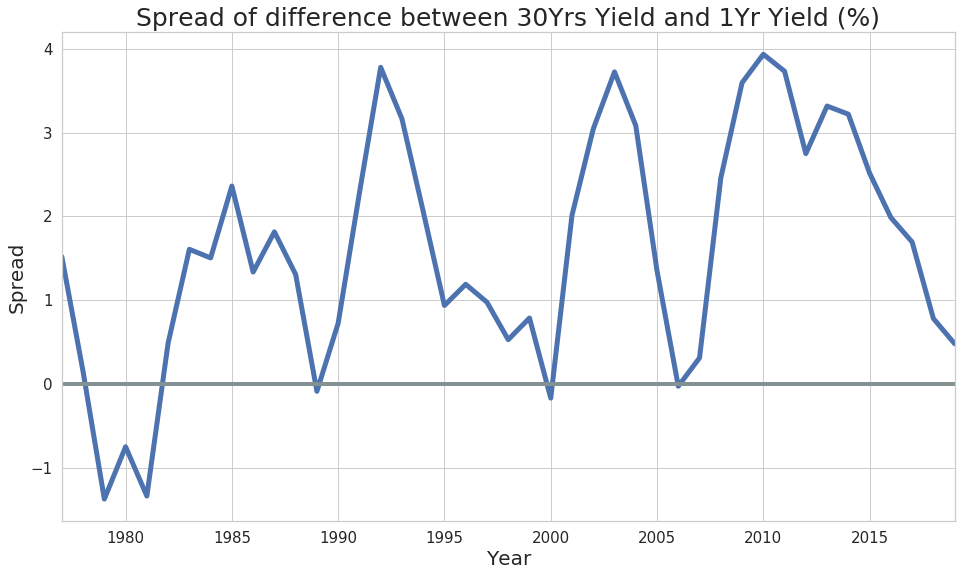

In [4]:
plt.figure(figsize=(16,9))

ax3 = sns.lineplot(x = 'Year', y = 'SPREAD', data = data, lw = 5, err_style=None, estimator='mean')
plt.plot([1977, 2019], [0, 0], color = '#839192', lw = 4)

plt.title('Spread of difference between 30Yrs Yield and 1Yr Yield (%)', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Spread', fontsize = 20)

ax3.set_xlim(1977, 2019)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

#the curve seems like will touch again

## Outcomes:

So....

1. 1978 - 1981. Wow. The 2 yield curves were on average inverted for 4 years. This is marking the **US Recession that started in 1980**.
2. Another touch in 1989. This is also marking the **US early 1990 Recession**, which was relatively mild, but still existed. (quite accurate!)
3. The year 2000. This is starting to look like a very good predictor. The **recessions in 2000** affected mostly the developed countries, and in US was coused by the Market Bubble.
4. Well this is actually ridiculous! Another touch in **2006**. I don't even need to address that period. US economy and employment had a slowdown, while the debts were rising. It was the climax for the **recession in 2008**.

And now we're approaching to the present. And as you can see from the second graph, that line is slowly but surely approaching the 0 line, where the difference between the 30 Yr Maturity and the 1 Yr Maturity is becoming negative. 

Seems that we have a big nasty surprise coming towards us.

# 5. Impact on Goods

Another interesting thing to see was the impact of these inversions on price of goods.

Gold, Oil or the Swiss Franc and Japanese Yen currencies need to react in some way to the inversion of the yield curve, right?

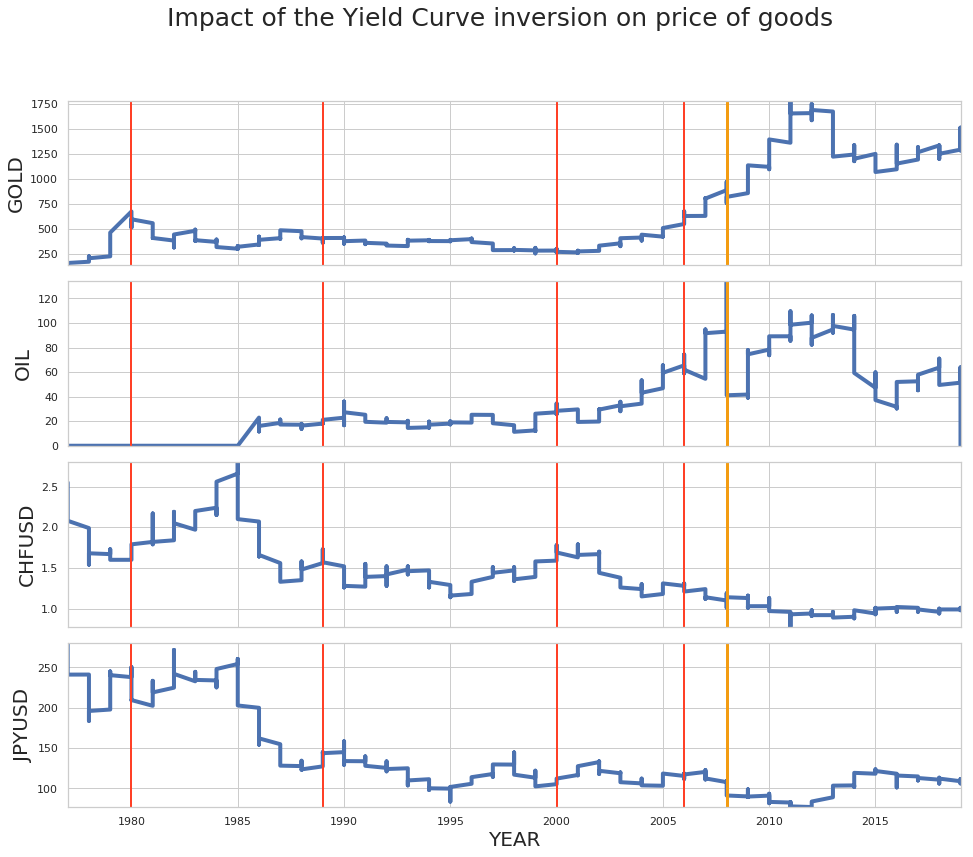

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex = True)
fig.set_figheight(13)
fig.set_figwidth(16)
plt.subplots_adjust(hspace = 0.1)

ax1.plot(data['Year'], data['GOLD'], lw = 4)
ax1.plot([1980, 1980], [90, 1800], '#FF4026', lw = 2)
ax1.plot([1989, 1989], [90, 1800], '#FF4026', lw = 2)
ax1.plot([2000, 2000], [90, 1800], '#FF4026', lw = 2)
ax1.plot([2006, 2006], [90, 1800], '#FF4026', lw = 2)
ax1.plot([2008, 2008], [90, 1800], '#F39C12', lw = 3)

ax2.plot(data['Year'], data['OIL'], lw = 4)
ax2.plot([1980, 1980], [0, 134], '#FF4026', lw = 2)
ax2.plot([1989, 1989], [0, 134], '#FF4026', lw = 2)
ax2.plot([2000, 2000], [0, 134], '#FF4026', lw = 2)
ax2.plot([2006, 2006], [0, 134], '#FF4026', lw = 2)
ax2.plot([2008, 2008], [0, 134], '#F39C12', lw = 3)

ax3.plot(data['Year'], data['CHFUSD'], lw = 4)
ax3.plot([1980, 1980], [0.78, 2.8], '#FF4026', lw = 2)
ax3.plot([1989, 1989], [0.78, 2.8], '#FF4026', lw = 2)
ax3.plot([2000, 2000], [0.78, 2.8], '#FF4026', lw = 2)
ax3.plot([2006, 2006], [0.78, 2.8], '#FF4026', lw = 2)
ax3.plot([2008, 2008], [0.78, 2.8], '#F39C12', lw = 3)

ax4.plot(data['Year'], data['JPYUSD'], lw = 4)
ax4.plot([1980, 1980], [76.64, 281], '#FF4026', lw = 2)
ax4.plot([1989, 1989], [76.64, 281], '#FF4026', lw = 2)
ax4.plot([2000, 2000], [76.64, 281], '#FF4026', lw = 2)
ax4.plot([2006, 2006], [76.64, 281], '#FF4026', lw = 2)
ax4.plot([2008, 2008], [76.64, 281], '#F39C12', lw = 3)

ax1.set_xlim(1977,2019) 
ax1.set_ylim(data['GOLD'].min(),data['GOLD'].max()) 
ax2.set_xlim(1977,2019)
ax2.set_ylim(data['OIL'].min(),data['OIL'].max()) 
ax3.set_xlim(1977,2019) 
ax3.set_ylim(data['CHFUSD'].min(),data['CHFUSD'].max()) 
ax4.set_xlim(1977,2019)
ax4.set_ylim(data['JPYUSD'].min(),data['JPYUSD'].max()) 

plt.xlabel('YEAR',fontsize = 20)
ax1.set_ylabel('GOLD', fontsize = 20)
ax2.set_ylabel('OIL', fontsize = 20)
ax3.set_ylabel('CHFUSD', fontsize = 20)
ax4.set_ylabel('JPYUSD', fontsize = 20)

fig.suptitle('Impact of the Yield Curve inversion on price of goods', fontsize = 25);

# 6. Compute Correlation Matrix

Not quite sure if there is a pattern to be discovered, although there can be seen some tendencies.

To be sure, let's check the *Pearson Correlation Coefficient* (you can see bellow the correlations and their level of confidence, which was very good for all of them).

-Gold was positively correlated (0.33). So **inverstors put their money in gold when times are uncertain**;

-Crude oil is positively correlated (0.44). **Same with oil**, investors store their money here when economy isn't at it's greatest;

-Swiss Franc is negatively correlated (-0.34). Investors run from the Swiss;

-Japanese Yen is negatively correlated (-0.42). They also run from the Japanese.

In [6]:
data['Flag is neg'] = np.where(data['SPREAD'] < 0, 1, 0)
corr_gold = sp.stats.pearsonr(x = data['SPREAD'], y = data['GOLD'])
corr_oil = sp.stats.pearsonr(x = data['SPREAD'], y = data['OIL'])
corr_sp500 = sp.stats.pearsonr(x = data['SPREAD'], y = data['SP500'])
corr_CHHUSD = sp.stats.pearsonr(x = data['SPREAD'], y = data['CHFUSD'])
corr_JPYUSD = sp.stats.pearsonr(x = data['SPREAD'], y = data['JPYUSD'])

print('Gold:', corr_gold, '\n'
     'Oil:', corr_oil, '\n'
     'SP500:', corr_sp500, '\n'
     'CHFUSD:', corr_CHHUSD, '\n'
     'JPYUSD:', corr_JPYUSD, '\n')
#All Significant

Gold: (0.3440429549802814, 1.2066336920994008e-15) 
Oil: (0.4434783544620567, 4.9338972211283926e-26) 
SP500: (0.23651376735944446, 6.291197139344645e-08) 
CHFUSD: (-0.34653496429066855, 7.2875045849147655e-16) 
JPYUSD: (-0.4294542449921522, 2.3907159514568464e-24) 



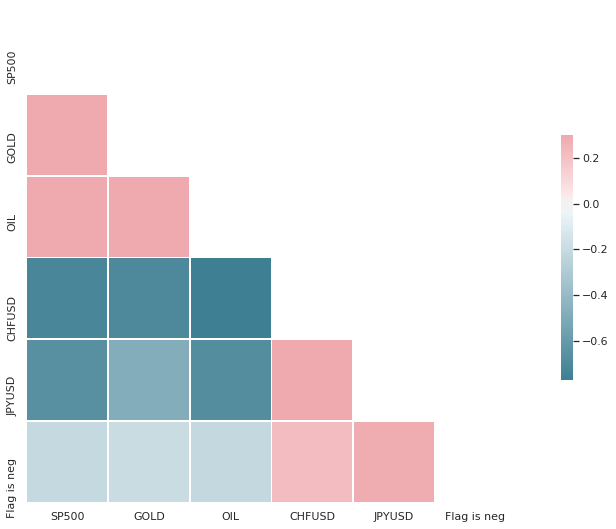

In [7]:
# Compute the correlation matrix
corr = data[['SP500', 'GOLD', 'OIL', 'CHFUSD', 'JPYUSD', 'Flag is neg']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# 7. What next?

In conclusion, are we going to have a recession?

Economists, politicians, analysts already debate this publicly. Even Ray Dalio said that in about 2-3 years we are going to experience another economic crisis.

And as can be seen, the yield curve never fails to predict this event, quite accurately I would add.

All that remains is for us to be prepared when that happens. If you would like a more in depth analysis economy wise, head out to the official article: https://www.lightstoneinsights.com/post/behind-the-scenes-of-the-us-yield-curve


### Update:
This report was done ~ October 2019. Now it's 17th April 2020. I know Ray Dalio foresaw something... but I don't know if he ACTUALLY foresaw this. 😅

![](https://i.imgur.com/tghJR3G.jpg)

<div class="alert alert-block alert-info">
<p><p>
<p>If you liked this, don't be shy, upvote! 😁<p>
<b>Cheers!<b>
<p><p>
</div>